___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Indest Data

In [97]:
df=pd.read_csv("Churn_Modelling.csv") # Read the data

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [98]:
df.info() # to get the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [99]:
df.shape 

(10000, 14)

In [100]:
df.describe() # to get the summary of the dataframe

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [101]:
df.isnull().sum() # No missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Exited', ylabel='count'>

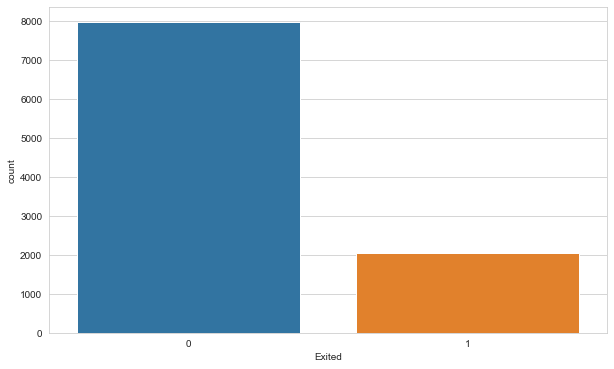

In [102]:
sns.countplot(df["Exited"]) # No of customers who exited the bank unbalance data

<AxesSubplot:>

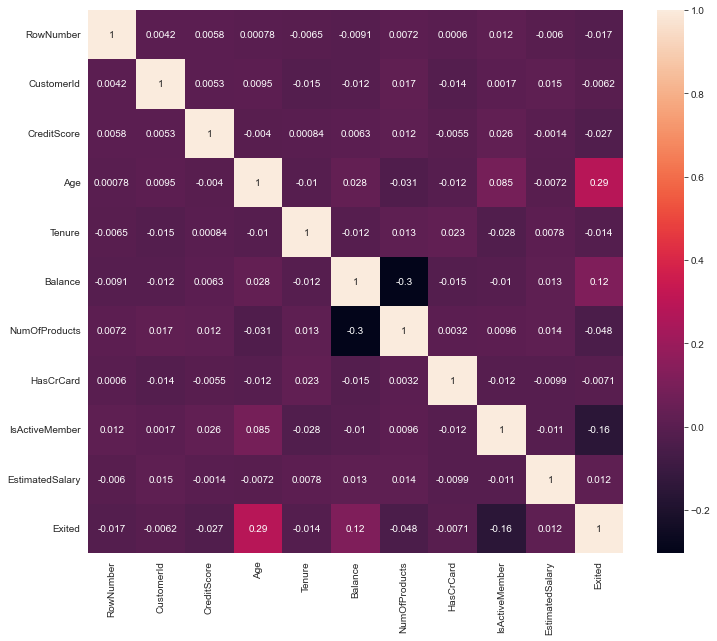

In [103]:
plt.figure(figsize=(12,10)) # to change the size of the plot
sns.heatmap(df[df.describe().columns].corr(),annot=True) # Heatmap of correlation between variables

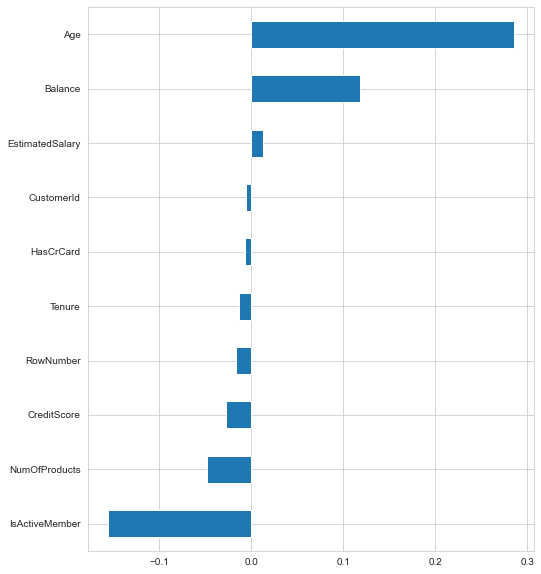

In [104]:
plt.figure(figsize = (8,10)) # to change the size of the plot
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh"); # Bar plot of correlation between variables

In [105]:
df=df.drop(["RowNumber","CustomerId","Surname"],axis=1) # Dropping unnecessary columns

In [106]:
df.head() 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [107]:
df.Geography.value_counts() # No of customers from each geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [108]:
df.IsActiveMember.value_counts() # No of customers who are active members

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='Balance', ylabel='Age'>

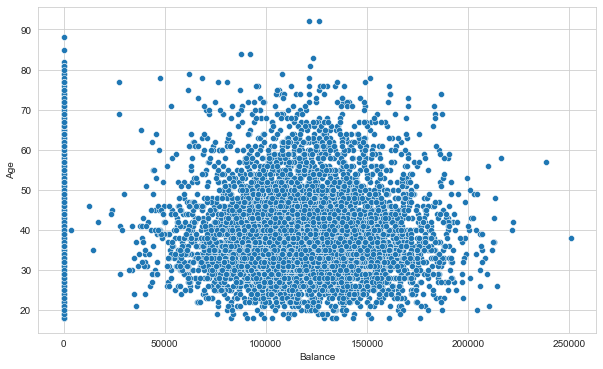

In [109]:
sns.scatterplot(data=df, x="Balance", y="Age") # Scatter plot of Balance and Age

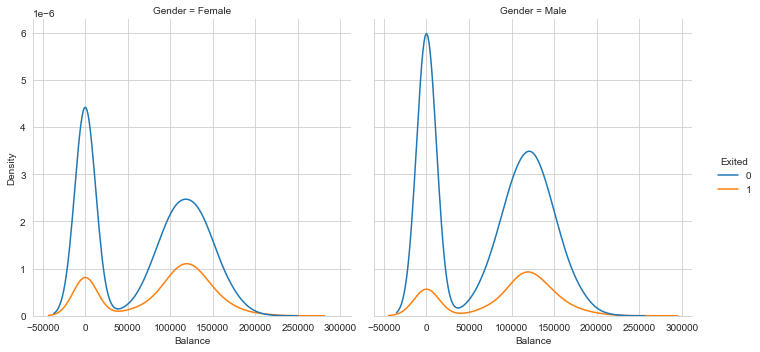

In [110]:
sns.displot(data=df, x="Balance", hue="Exited", col="Gender", kind="kde")

In [111]:
df["diff"]=0 
df.loc[df.Balance<=50000,"diff"]=2
df.loc[df.Balance>50000,"diff"]=4


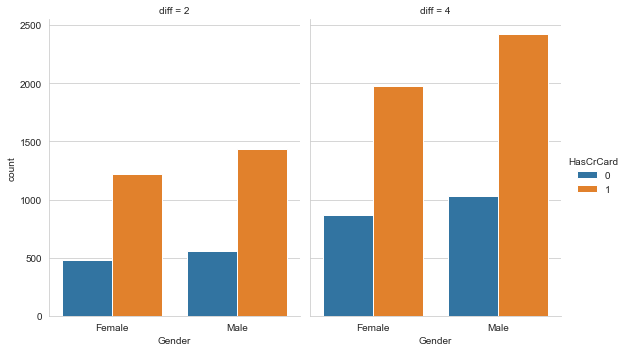

In [112]:
sns.catplot(x="Gender", hue="HasCrCard",col="diff", data=df,kind="count",height=5, aspect=.8) 

<AxesSubplot:xlabel='Exited', ylabel='count'>

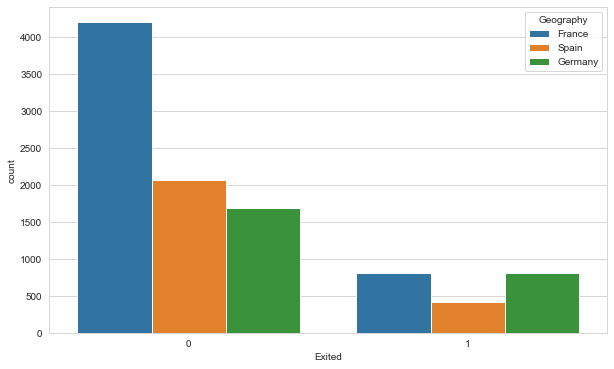

In [113]:
sns.countplot(x='Exited',data=df, hue='Geography')

<Figure size 576x720 with 0 Axes>

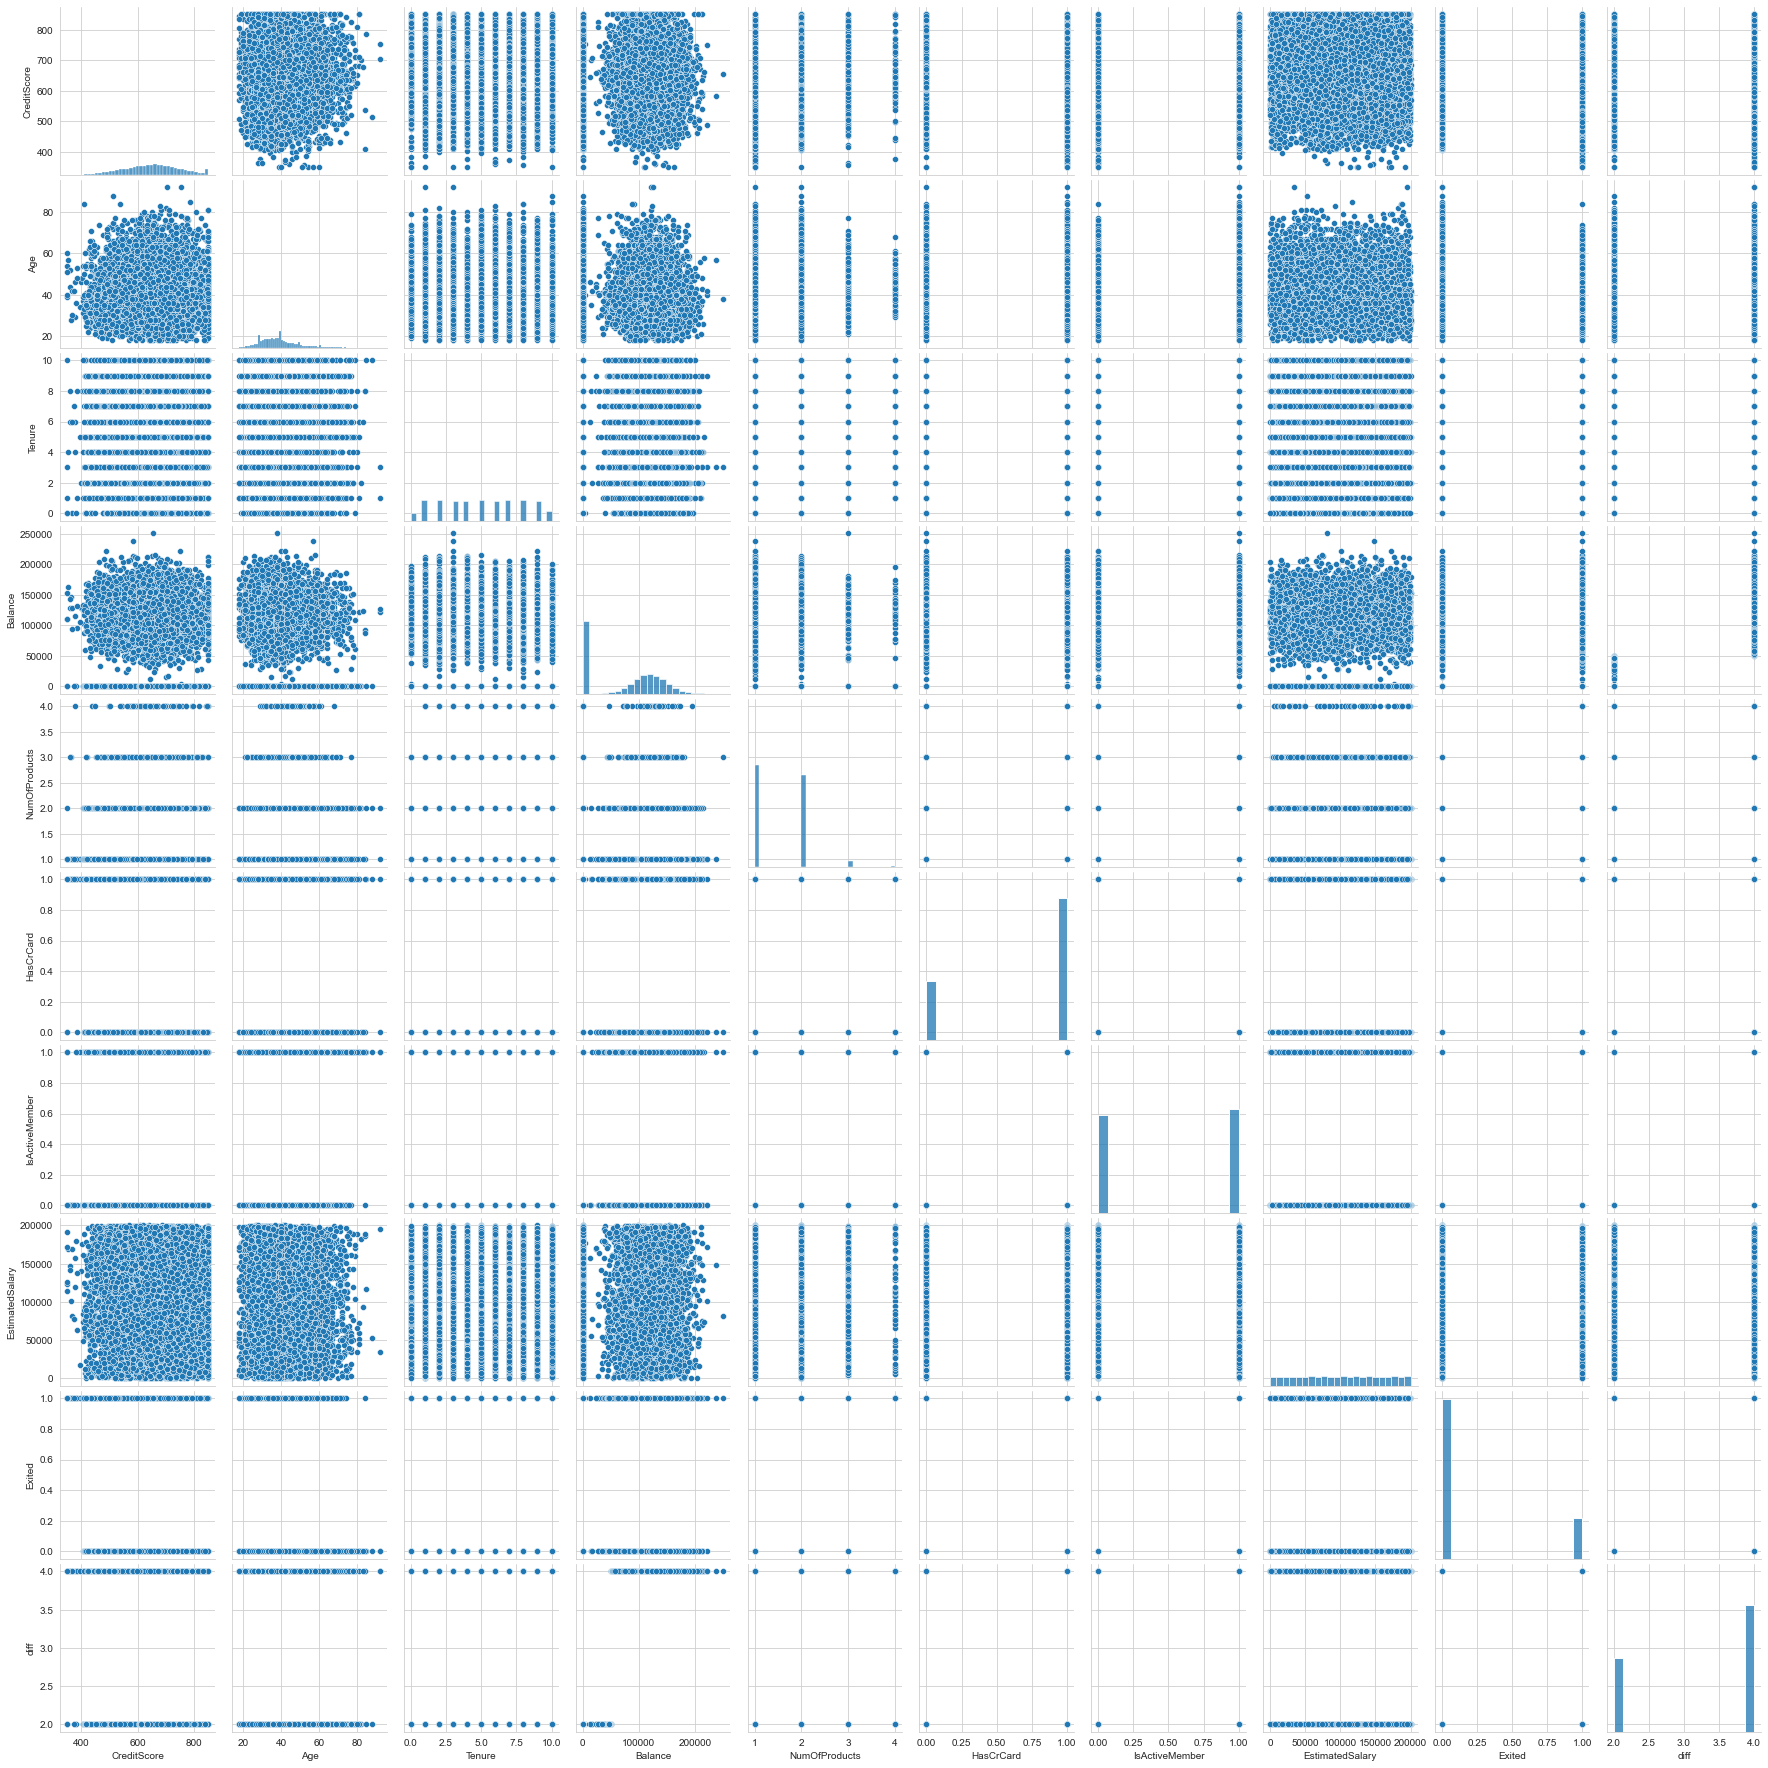

In [114]:
plt.figure(figsize = (8,10)) 
sns.pairplot(df) 

In [115]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,diff
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,2
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,4
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,4
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,2
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,4


In [116]:
df_dum=pd.get_dummies(df) 

In [117]:
df_dum.shape

(10000, 15)

## Preprocessing of Data
- Train | Test Split, Scalling

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
Y = df_dum['Exited']
X = df_dum.drop('Exited', axis = 1)

In [120]:
X.shape

(10000, 14)

In [121]:
seed = 41

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size=0.2, random_state=seed)

In [123]:
from sklearn.preprocessing import MinMaxScaler

In [124]:
scaler = MinMaxScaler()

In [125]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
X_train.shape

(8000, 14)

In [127]:
X_test.shape

(2000, 14)

## Modelling & Model Performance

### Import related libraries

In [128]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

### Creating Model

### without class_weigth

In [129]:
model = Sequential()
model.add(Dense(25, activation='relu',input_dim = X_train.shape[1]))
model.add(Dense(15, activation='relu'))
model.add(Dense(5,  activation = 'relu'))
model.add(Dense(1, activation='sigmoid')) # we use sigmoid for binary output

In [130]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 25)                375       
                                                                 
 dense_9 (Dense)             (None, 15)                390       
                                                                 
 dense_10 (Dense)            (None, 5)                 80        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [131]:
opt=Adam(lr=0.001)

In [132]:
model.compile(optimizer = opt,loss = 'binary_crossentropy', metrics = ['accuracy'])

In [133]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 10)

#### Evaluate

In [134]:
model.fit(x = X_train, y = y_train, epochs=100, validation_split = 0.15, batch_size=32,verbose=1,callbacks = [early_stop])

Epoch 1/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4943 - accuracy: 0.7969 - val_loss: 0.4878 - val_accuracy: 0.7883
Epoch 2/100
213/213 [==============================] - 1s 2ms/step - loss: 0.4662 - accuracy: 0.7976 - val_loss: 0.4795 - val_accuracy: 0.7883
Epoch 3/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4565 - accuracy: 0.7985 - val_loss: 0.4674 - val_accuracy: 0.7925
Epoch 4/100
213/213 [==============================] - 1s 3ms/step - loss: 0.4415 - accuracy: 0.8115 - val_loss: 0.4513 - val_accuracy: 0.8025
Epoch 5/100
213/213 [==============================] - 1s 2ms/step - loss: 0.4250 - accuracy: 0.8185 - val_loss: 0.4273 - val_accuracy: 0.8058
Epoch 6/100
213/213 [==============================] - 1s 2ms/step - loss: 0.4103 - accuracy: 0.8203 - val_loss: 0.4145 - val_accuracy: 0.8192
Epoch 7/100
213/213 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8269 - val_loss: 0.3972 - val_accuracy: 0.8233

In [135]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.494,0.797,0.488,0.788
1,0.466,0.798,0.479,0.788
2,0.457,0.799,0.467,0.793
3,0.442,0.811,0.451,0.803
4,0.425,0.819,0.427,0.806


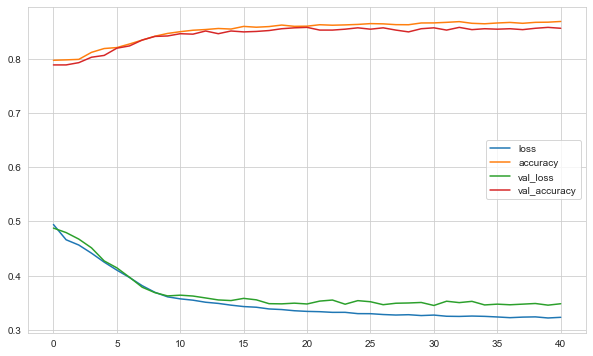

In [136]:
loss_df.plot();

In [137]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3410208523273468
accuracy :  0.8579999804496765


In [138]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve,precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate

In [139]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1488  105]
 [ 179  228]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1593
           1       0.68      0.56      0.62       407

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.76      2000
weighted avg       0.85      0.86      0.85      2000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

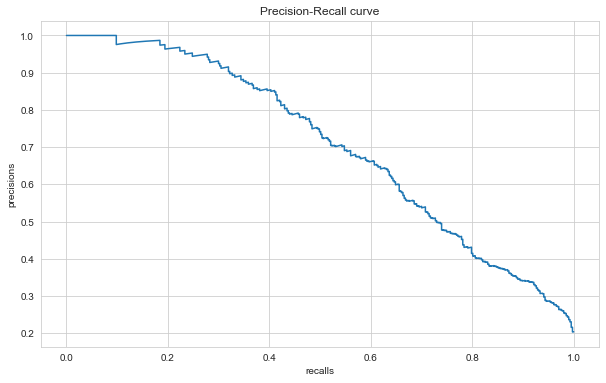

In [140]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [141]:
average_precision_score(y_test, y_pred_proba) #classification perform 

0.704729376485388

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [142]:
model_weighted = Sequential()

tf.random.set_seed(seed)

model_weighted.add(Dense(25, activation="relu"))
model_weighted.add(Dense(15, activation="relu"))
model_weighted.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.002)
model_weighted.compile(optimizer=opt, loss="binary_crossentropy",metrics=["Recall"]) #choosed recall

In [151]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [152]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [153]:
model_weighted.fit(x=X_train, y=y_train, epochs=250, batch_size=32, validation_split = 0.1, verbose=1, class_weight=class_weights, callbacks = [early_stop])

Epoch 1/250
225/225 [==============================] - 3s 4ms/step - loss: 0.6683 - recall: 0.5435 - val_loss: 0.6500 - val_recall: 0.6491
Epoch 2/250
225/225 [==============================] - 1s 2ms/step - loss: 0.6191 - recall: 0.6367 - val_loss: 0.6296 - val_recall: 0.6140
Epoch 3/250
225/225 [==============================] - 1s 2ms/step - loss: 0.5999 - recall: 0.6436 - val_loss: 0.6606 - val_recall: 0.7193
Epoch 4/250
225/225 [==============================] - 1s 3ms/step - loss: 0.5864 - recall: 0.6888 - val_loss: 0.6320 - val_recall: 0.6959
Epoch 5/250
225/225 [==============================] - 1s 2ms/step - loss: 0.5788 - recall: 0.6943 - val_loss: 0.6105 - val_recall: 0.6608
Epoch 6/250
225/225 [==============================] - 1s 2ms/step - loss: 0.5733 - recall: 0.7032 - val_loss: 0.5394 - val_recall: 0.5789
Epoch 7/250
225/225 [==============================] - 1s 2ms/step - loss: 0.5619 - recall: 0.7080 - val_loss: 0.5490 - val_recall: 0.6433
Epoch 8/250
225/225 [======

<AxesSubplot:>

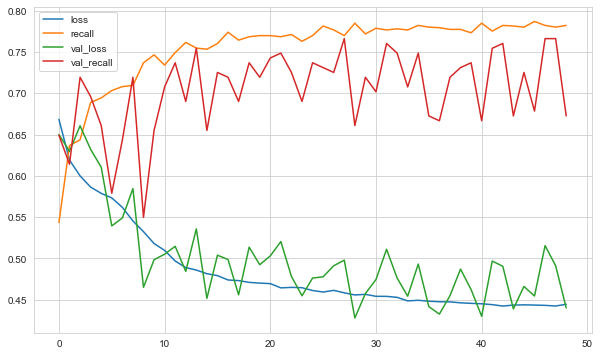

In [155]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.plot()

#### Evaluate

In [157]:
y_pred = (model_weighted.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))  #balanced score passed :)

[[1309  284]
 [ 118  289]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1593
           1       0.50      0.71      0.59       407

    accuracy                           0.80      2000
   macro avg       0.71      0.77      0.73      2000
weighted avg       0.83      0.80      0.81      2000



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

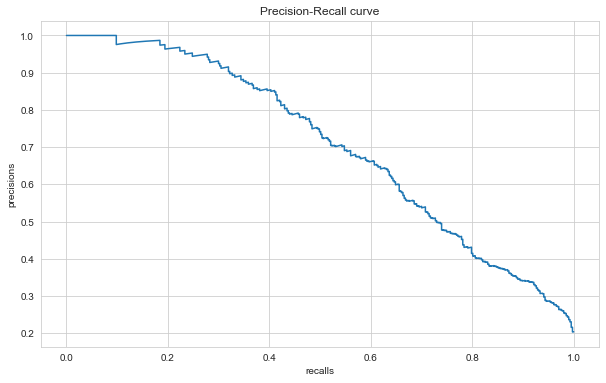

In [158]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()                                             

In [159]:
average_precision_score(y_test, y_pred_proba)

0.704729376485388

## GridSearchCV

In [171]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD
from sklearn.model_selection import GridSearchCV

In [172]:
def build_classifier(optimizer,learn_rate):  #recognize a object with keras
    classifier = Sequential()
    classifier.add(Dense(units=25, activation='relu'))
    classifier.add(Dense(units=15, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [173]:
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [174]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [175]:
tf.random.set_seed(seed)

classifier = KerasClassifier(build_fn=build_classifier, epochs=200)
parameters = {
    'batch_size': [128, 256],
    'optimizer': [Adam, RMSprop, Nadam, Adadelta, SGD],
    'learn_rate': [0.001, 0.003, 0.005]
}


In [176]:
grid_model = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='recall',cv=5,n_jobs=-1,
                                               verbose=0).fit(X_train,y_train,class_weight=class_weights,callbacks=[early_stop])

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6630 - recall: 0.5828
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6242 - recall: 0.6196
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6102 - recall: 0.6491
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6015 - recall: 0.6491
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5933 - recall: 0.6761
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5870 - recall: 0.6914
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5815 - recall: 0.6828
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5778 - recall: 0.6945
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5739 - recall: 0.7043
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5656 - recall: 0.6982
Epoch 11/200
32/32 [=========

32/32 [==============================] - 0s 2ms/step - loss: 0.4715 - recall: 0.7706
Epoch 28/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4713 - recall: 0.7730
Epoch 29/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4716 - recall: 0.7663
Epoch 30/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4693 - recall: 0.7706
Epoch 31/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4667 - recall: 0.7650
Epoch 32/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4664 - recall: 0.7699
Epoch 33/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4650 - recall: 0.7724
Epoch 34/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4671 - recall: 0.7681
Epoch 35/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4634 - recall: 0.7712
Epoch 36/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4632 - recall: 0.7742
Epoch 37/200
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.4523 - recall: 0.7736
Epoch 55/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4542 - recall: 0.7822
Epoch 56/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4537 - recall: 0.7816
Epoch 57/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4527 - recall: 0.7761
Epoch 58/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4514 - recall: 0.7748
Epoch 59/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4481 - recall: 0.7779
Epoch 60/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4496 - recall: 0.7798
Epoch 61/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4493 - recall: 0.7804
Epoch 62/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4496 - recall: 0.7755
Epoch 63/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4483 - recall: 0.7828
Epoch 64/200
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.4449 - recall: 0.7748
Epoch 82/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4431 - recall: 0.7810
Epoch 83/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4436 - recall: 0.7742
Epoch 84/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4443 - recall: 0.7755
Epoch 85/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4431 - recall: 0.7748
Epoch 86/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4420 - recall: 0.7748
Epoch 87/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4417 - recall: 0.7847
Epoch 88/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4397 - recall: 0.7730
Epoch 89/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4422 - recall: 0.7773
Epoch 90/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4417 - recall: 0.7785
Epoch 91/200
32/32 [=============

32/32 [==============================] - 0s 2ms/step - loss: 0.4377 - recall: 0.7822
Epoch 109/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4367 - recall: 0.7779
Epoch 110/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4366 - recall: 0.7883
Epoch 111/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4410 - recall: 0.7773
Epoch 112/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4368 - recall: 0.7951
Epoch 113/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4381 - recall: 0.7822
Epoch 114/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4360 - recall: 0.7791
Epoch 115/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4378 - recall: 0.7896
Epoch 116/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4375 - recall: 0.7810
Epoch 117/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4348 - recall: 0.7896
Epoch 118/200
32/32 [===

32/32 [==============================] - 0s 2ms/step - loss: 0.4322 - recall: 0.7847
Epoch 135/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4334 - recall: 0.7847
Epoch 136/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4349 - recall: 0.7791
Epoch 137/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4333 - recall: 0.7926
Epoch 138/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4324 - recall: 0.7816
Epoch 139/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4346 - recall: 0.7742
Epoch 140/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4340 - recall: 0.7853
Epoch 141/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4328 - recall: 0.7810
Epoch 142/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4327 - recall: 0.7828
Epoch 143/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4305 - recall: 0.7902
Epoch 144/200
32/32 [===

32/32 [==============================] - 0s 2ms/step - loss: 0.4290 - recall: 0.7816
Epoch 162/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4323 - recall: 0.7877
Epoch 163/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4302 - recall: 0.7834
Epoch 164/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4301 - recall: 0.7822
Epoch 165/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4269 - recall: 0.7908
Epoch 166/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4313 - recall: 0.7847
Epoch 167/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4278 - recall: 0.7896
Epoch 168/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4278 - recall: 0.7822
Epoch 169/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4278 - recall: 0.7969
Epoch 170/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4285 - recall: 0.7755
Epoch 171/200
32/32 [===

32/32 [==============================] - 0s 2ms/step - loss: 0.4263 - recall: 0.7896
Epoch 188/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4227 - recall: 0.7914
Epoch 189/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4265 - recall: 0.7871
Epoch 190/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4260 - recall: 0.7902
Epoch 191/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4254 - recall: 0.7890
Epoch 192/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4269 - recall: 0.7828
Epoch 193/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4260 - recall: 0.7896
Epoch 194/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4261 - recall: 0.7877
Epoch 195/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4240 - recall: 0.7896
Epoch 196/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4262 - recall: 0.7975
Epoch 197/200
32/32 [===

In [177]:
grid_model.best_score_

0.7682908163226994

In [178]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.003,
 'optimizer': keras.optimizer_v2.rmsprop.RMSprop}

In [179]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1223  370]
 [ 101  306]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1593
           1       0.45      0.75      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.76      0.78      2000



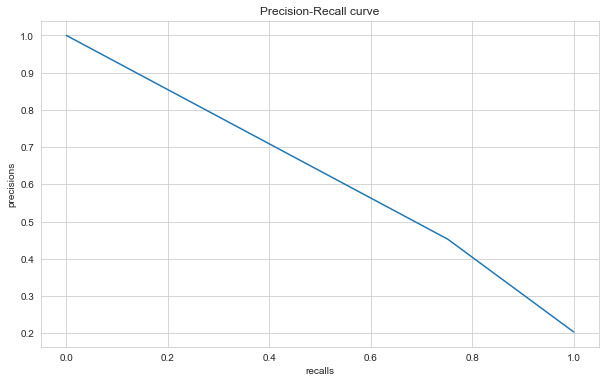

In [180]:
y_pred_proba = grid_model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [181]:
average_precision_score(y_test, y_pred_proba)

0.3908311864850326

#### Evaluate

## Final Model and Model Deployment

In [182]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.003)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=256,
          epochs=200,
          verbose=1,
          class_weight=class_weights) 

Epoch 1/200
32/32 [==============================] - 1s 14ms/step - loss: 0.6994 - recall: 0.5926 - val_loss: 0.6491 - val_recall: 0.5135
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6595 - recall: 0.5945 - val_loss: 0.6371 - val_recall: 0.6069
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6397 - recall: 0.6135 - val_loss: 0.6278 - val_recall: 0.6388
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6273 - recall: 0.6135 - val_loss: 0.6348 - val_recall: 0.7076
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6164 - recall: 0.6712 - val_loss: 0.6142 - val_recall: 0.6929
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6039 - recall: 0.6871 - val_loss: 0.6087 - val_recall: 0.7248
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5926 - recall: 0.6847 - val_loss: 0.6409 - val_recall: 0.8084
Epoch 8/200
32/32 [=====================

32/32 [==============================] - 0s 4ms/step - loss: 0.4918 - recall: 0.7583 - val_loss: 0.4984 - val_recall: 0.7789
Epoch 24/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4896 - recall: 0.7656 - val_loss: 0.4636 - val_recall: 0.7396
Epoch 25/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4895 - recall: 0.7638 - val_loss: 0.4614 - val_recall: 0.7371
Epoch 26/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4837 - recall: 0.7650 - val_loss: 0.4289 - val_recall: 0.7002
Epoch 27/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4876 - recall: 0.7521 - val_loss: 0.5909 - val_recall: 0.8624
Epoch 28/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4840 - recall: 0.7706 - val_loss: 0.4974 - val_recall: 0.7715
Epoch 29/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4798 - recall: 0.7607 - val_loss: 0.5025 - val_recall: 0.7887
Epoch 30/200
32/32 [===========================

Epoch 46/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4650 - recall: 0.7828 - val_loss: 0.4119 - val_recall: 0.6978
Epoch 47/200
32/32 [==============================] - 0s 6ms/step - loss: 0.4649 - recall: 0.7632 - val_loss: 0.5190 - val_recall: 0.8206
Epoch 48/200
32/32 [==============================] - 0s 6ms/step - loss: 0.4576 - recall: 0.7748 - val_loss: 0.4993 - val_recall: 0.8084
Epoch 49/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4594 - recall: 0.7706 - val_loss: 0.5032 - val_recall: 0.8133
Epoch 50/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4600 - recall: 0.7755 - val_loss: 0.4426 - val_recall: 0.7396
Epoch 51/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4581 - recall: 0.7681 - val_loss: 0.4221 - val_recall: 0.7052
Epoch 52/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4588 - recall: 0.7699 - val_loss: 0.4385 - val_recall: 0.7420
Epoch 53/200
32/32 [==============

32/32 [==============================] - 0s 5ms/step - loss: 0.4510 - recall: 0.7816 - val_loss: 0.4005 - val_recall: 0.7076
Epoch 69/200
32/32 [==============================] - 0s 6ms/step - loss: 0.4515 - recall: 0.7675 - val_loss: 0.4935 - val_recall: 0.8034
Epoch 70/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4496 - recall: 0.7761 - val_loss: 0.4500 - val_recall: 0.7494
Epoch 71/200
32/32 [==============================] - 0s 6ms/step - loss: 0.4485 - recall: 0.7730 - val_loss: 0.4969 - val_recall: 0.7936
Epoch 72/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4514 - recall: 0.7736 - val_loss: 0.4374 - val_recall: 0.7420
Epoch 73/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4581 - recall: 0.7626 - val_loss: 0.5376 - val_recall: 0.8256
Epoch 74/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4495 - recall: 0.7773 - val_loss: 0.4873 - val_recall: 0.7838
Epoch 75/200
32/32 [===========================

Epoch 91/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4454 - recall: 0.7755 - val_loss: 0.4307 - val_recall: 0.7322
Epoch 92/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4457 - recall: 0.7730 - val_loss: 0.4351 - val_recall: 0.7445
Epoch 93/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4432 - recall: 0.7834 - val_loss: 0.4315 - val_recall: 0.7371
Epoch 94/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4451 - recall: 0.7785 - val_loss: 0.4566 - val_recall: 0.7543
Epoch 95/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4434 - recall: 0.7767 - val_loss: 0.4772 - val_recall: 0.7961
Epoch 96/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4469 - recall: 0.7755 - val_loss: 0.4593 - val_recall: 0.7690
Epoch 97/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4475 - recall: 0.7742 - val_loss: 0.4244 - val_recall: 0.7297
Epoch 98/200
32/32 [==============

32/32 [==============================] - 0s 4ms/step - loss: 0.4464 - recall: 0.7742 - val_loss: 0.4819 - val_recall: 0.7985
Epoch 114/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4434 - recall: 0.7840 - val_loss: 0.5454 - val_recall: 0.8280
Epoch 115/200
32/32 [==============================] - 0s 6ms/step - loss: 0.4471 - recall: 0.7742 - val_loss: 0.4033 - val_recall: 0.7101
Epoch 116/200
32/32 [==============================] - 0s 6ms/step - loss: 0.4414 - recall: 0.7755 - val_loss: 0.4832 - val_recall: 0.8010
Epoch 117/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4415 - recall: 0.7865 - val_loss: 0.4459 - val_recall: 0.7543
Epoch 118/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4402 - recall: 0.7822 - val_loss: 0.4079 - val_recall: 0.7224
Epoch 119/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4465 - recall: 0.7613 - val_loss: 0.4452 - val_recall: 0.7568
Epoch 120/200
32/32 [====================

32/32 [==============================] - 0s 4ms/step - loss: 0.4414 - recall: 0.7822 - val_loss: 0.4047 - val_recall: 0.7199
Epoch 136/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4453 - recall: 0.7748 - val_loss: 0.5103 - val_recall: 0.8133
Epoch 137/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4405 - recall: 0.7761 - val_loss: 0.4761 - val_recall: 0.7912
Epoch 138/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4408 - recall: 0.7779 - val_loss: 0.4103 - val_recall: 0.7150
Epoch 139/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4387 - recall: 0.7755 - val_loss: 0.4971 - val_recall: 0.8133
Epoch 140/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4398 - recall: 0.7791 - val_loss: 0.4988 - val_recall: 0.8108
Epoch 141/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4409 - recall: 0.7767 - val_loss: 0.4882 - val_recall: 0.8084
Epoch 142/200
32/32 [====================

32/32 [==============================] - 0s 4ms/step - loss: 0.4369 - recall: 0.7828 - val_loss: 0.4373 - val_recall: 0.7518
Epoch 158/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4413 - recall: 0.7626 - val_loss: 0.4969 - val_recall: 0.7985
Epoch 159/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4402 - recall: 0.7748 - val_loss: 0.5085 - val_recall: 0.8157
Epoch 160/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4375 - recall: 0.7791 - val_loss: 0.4740 - val_recall: 0.7838
Epoch 161/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4358 - recall: 0.7736 - val_loss: 0.4363 - val_recall: 0.7592
Epoch 162/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4381 - recall: 0.7767 - val_loss: 0.4643 - val_recall: 0.7789
Epoch 163/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4356 - recall: 0.7755 - val_loss: 0.4561 - val_recall: 0.7666
Epoch 164/200
32/32 [====================

32/32 [==============================] - 0s 4ms/step - loss: 0.4369 - recall: 0.7773 - val_loss: 0.4978 - val_recall: 0.7985
Epoch 180/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4343 - recall: 0.7816 - val_loss: 0.5020 - val_recall: 0.8133
Epoch 181/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4362 - recall: 0.7816 - val_loss: 0.4589 - val_recall: 0.7813
Epoch 182/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4354 - recall: 0.7742 - val_loss: 0.4456 - val_recall: 0.7543
Epoch 183/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4341 - recall: 0.7890 - val_loss: 0.3712 - val_recall: 0.6585
Epoch 184/200
32/32 [==============================] - 0s 5ms/step - loss: 0.4401 - recall: 0.7798 - val_loss: 0.4075 - val_recall: 0.7125
Epoch 185/200
32/32 [==============================] - 0s 3ms/step - loss: 0.4374 - recall: 0.7798 - val_loss: 0.5635 - val_recall: 0.8477
Epoch 186/200
32/32 [====================

<AxesSubplot:>

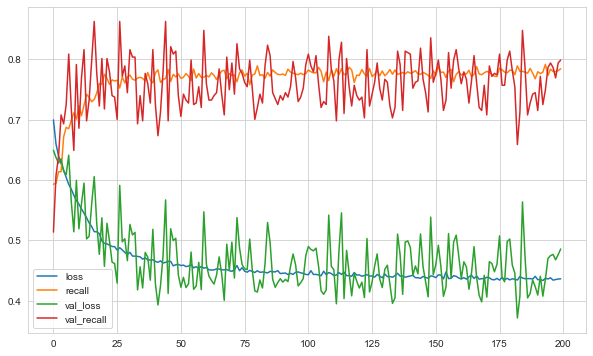

In [183]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [184]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.4855826199054718
recall :  0.7985258102416992


In [185]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))   #scorelar farklı derecede iyi 

[[1186  407]
 [  82  325]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1593
           1       0.44      0.80      0.57       407

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.84      0.76      0.78      2000



In [186]:
model.save('model_churn.h5')

### Prediction

In [189]:
single_customer = df_dum.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
diff                     2.000
Geography_France         1.000
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Female            1.000
Gender_Male              0.000
Name: 0, dtype: float64

In [191]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 14))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50654122, 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        ]])

In [192]:
y_pred =(model.predict(single_customer) > 0.5).astype("int32")
y_pred

array([[1]])

In [193]:
df["Exited"].iloc[0]

1

# Comparison with ML

### Logistic Regression

In [194]:
from sklearn.linear_model import LogisticRegression

In [195]:
log_model=LogisticRegression(class_weight='balanced')
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1136  457]
 [ 118  289]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



### Random Forest

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1526   67]
 [ 214  193]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.74      0.47      0.58       407

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



#### DL IS GREAT :)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___